In [8]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from env_helpers import make_env
from visualization import states_to_imgs
# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()




Raw observation type: <class 'numpy.ndarray'>
Raw observation shape: (3, 48, 48)
Raw observation dtype: float64
Raw observation range: [0.000, 1.000]
Channels: 3, Height: 48, Width: 48
Channel 0 unique values: [0.         0.12941176 0.21568627 0.21960784 0.39215686 0.44313725
 0.55294118 0.88627451 1.        ]
Channel 1 unique values: [0.         0.12941176 0.21568627 0.39215686 1.        ]
Channel 2 unique values: [0.         0.12941176 0.21568627 0.39215686]


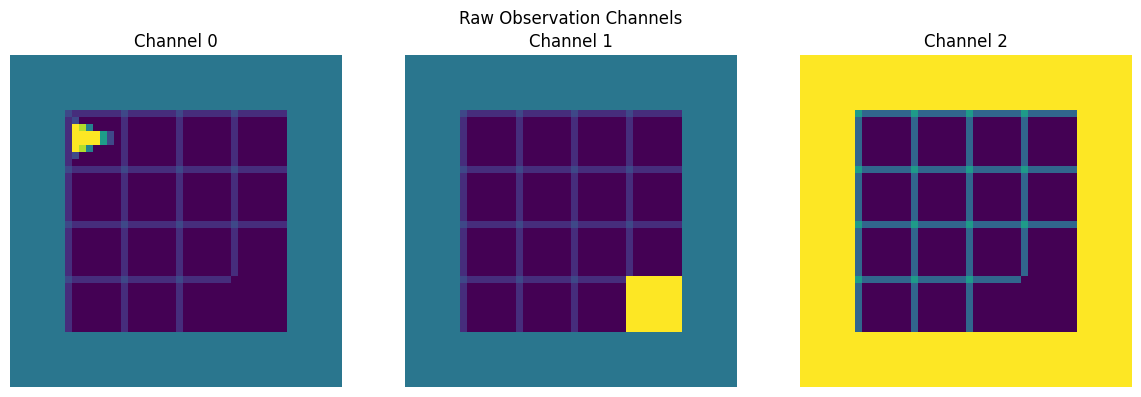

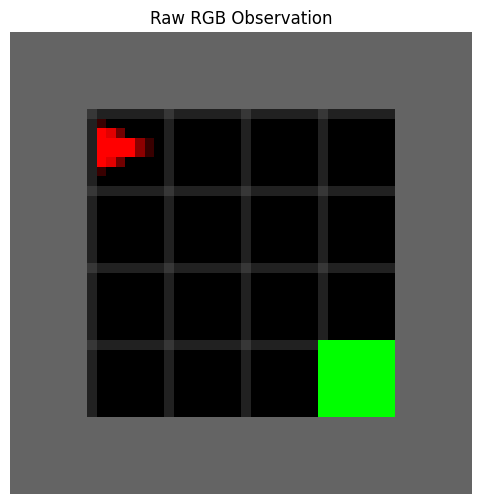

In [15]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from env_helpers import make_env
from visualization import states_to_imgs





env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()



obs = obs[0]

print(f"Raw observation type: {type(obs)}")
print(f"Raw observation shape: {obs.shape}")
print(f"Raw observation dtype: {obs.dtype}")
print(f"Raw observation range: [{obs.min():.3f}, {obs.max():.3f}]")

# Check if observation has proper spatial dimensions
if len(obs.shape) == 3:
    print(f"Channels: {obs.shape[0]}, Height: {obs.shape[1]}, Width: {obs.shape[2]}")

# Visualize each channel
fig, axes = plt.subplots(1, obs.shape[0], figsize=(12, 4))
if obs.shape[0] == 1:
    axes = [axes]

for i in range(obs.shape[0]):
    channel = obs[i]
    axes[i].imshow(channel, cmap='viridis')
    axes[i].set_title(f'Channel {i}')
    axes[i].axis('off')
    print(f"Channel {i} unique values: {np.unique(channel)}")

plt.suptitle('Raw Observation Channels')
plt.tight_layout()
plt.savefig('debug_raw_channels.png', dpi=150, bbox_inches='tight')
plt.show()


# Visualize full RGB if 3 channels
if obs.shape[0] == 3:
    rgb_img = obs.transpose(1, 2, 0)
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_img.clip(0, 1))
    plt.title('Raw RGB Observation')
    plt.axis('off')
    plt.savefig('debug_raw_rgb.png', dpi=150, bbox_inches='tight')
    plt.show()


Input tensor shape: torch.Size([3, 48, 48])
Input tensor dtype: torch.float32
Input tensor range: [0.000, 1.000]
Processing tensor shape: torch.Size([1, 3, 48, 48])
Converted output type: <class 'numpy.ndarray'>
Converted output shape: (1, 3, 48, 48)
Converted output dtype: float32
Converted output range: [0.000, 1.000]


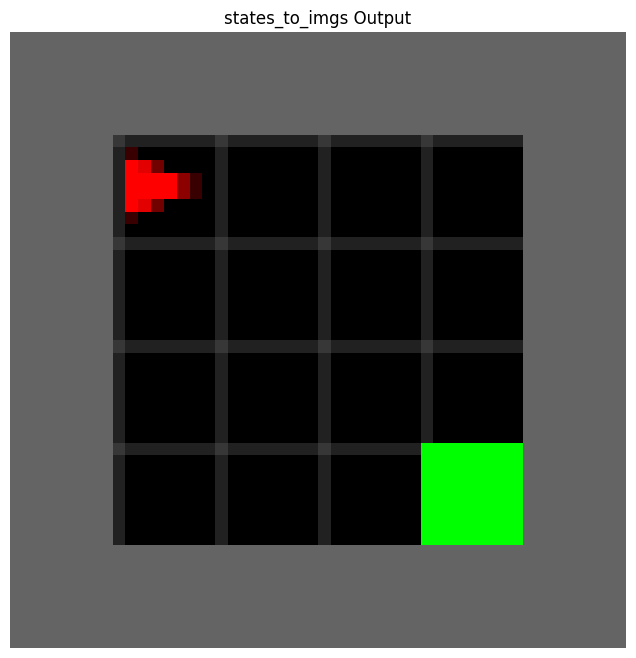

In [16]:
if isinstance(obs, np.ndarray):
    obs_tensor = torch.from_numpy(obs).float()
else:
    obs_tensor = obs.float()

print(f"Input tensor shape: {obs_tensor.shape}")
print(f"Input tensor dtype: {obs_tensor.dtype}")
print(f"Input tensor range: [{obs_tensor.min():.3f}, {obs_tensor.max():.3f}]")

# Test states_to_imgs function

if len(obs_tensor.shape) == 3:
    obs_tensor = obs_tensor.unsqueeze(0)  # Add batch dimension

print(f"Processing tensor shape: {obs_tensor.shape}")

# Call states_to_imgs
converted_imgs = states_to_imgs(obs_tensor, env_name='MiniGrid-Empty-6x6-v0')

print(f"Converted output type: {type(converted_imgs)}")
print(f"Converted output shape: {converted_imgs.shape}")
print(f"Converted output dtype: {converted_imgs.dtype}")
print(f"Converted output range: [{converted_imgs.min():.3f}, {converted_imgs.max():.3f}]")

# Visualize the conversion result
if len(converted_imgs.shape) == 4:  # Batch of images
    img = converted_imgs[0]
else:
    img = converted_imgs

# Handle different channel arrangements
if len(img.shape) == 3:
    if img.shape[0] <= 3:  # Channels first
        img_display = img.transpose(1, 2, 0)
    else:  # Channels last
        img_display = img
else:
    img_display = img

plt.figure(figsize=(8, 8))
plt.imshow(img_display.clip(0, 1))
plt.title('states_to_imgs Output')
plt.axis('off')
plt.savefig('debug_states_to_imgs.png', dpi=150, bbox_inches='tight')
plt.show()


Step 1: Raw MiniGrid environment
  Raw obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  Raw image shape: (7, 7, 3)
Step 2: After RGBImgPartialObsWrapper
  RGB obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  RGB image shape: (56, 56, 3)
  RGB image range: [76, 255]
Step 3: After ImgObsWrapper
  ImgObs type: <class 'numpy.ndarray'>, shape: (56, 56, 3)
  ImgObs range: [76, 255]
Step 4: After Custom2DWrapper
  Final obs type: <class 'numpy.ndarray'>, shape: (3, 56, 56)
  Final obs range: [0.298, 1.000]


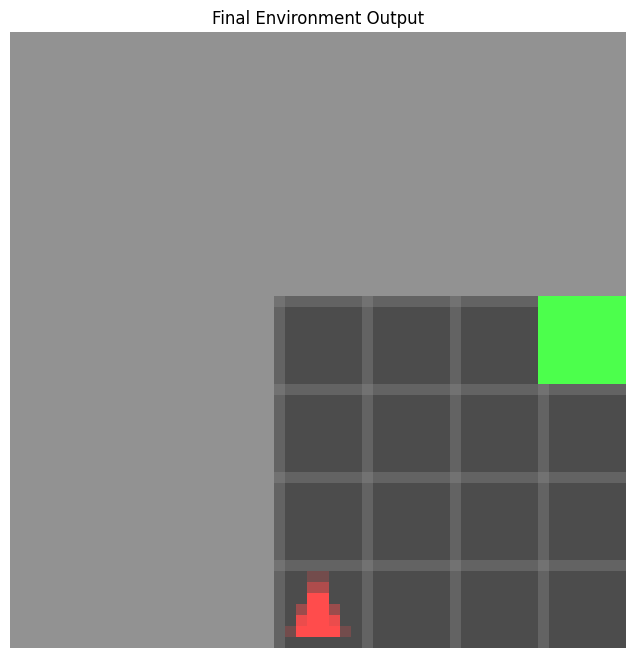

In [21]:
import gymnasium as gym
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
from env_helpers import Custom2DWrapper

# Step 1: Raw MiniGrid
print("Step 1: Raw MiniGrid environment")
env1 = gym.make('MiniGrid-Empty-6x6-v0')
obs1 = env1.reset()
if isinstance(obs1, tuple):
    obs1 = obs1[0]
print(f"  Raw obs type: {type(obs1)}, keys: {list(obs1.keys()) if isinstance(obs1, dict) else 'not dict'}")
if isinstance(obs1, dict) and 'image' in obs1:
    print(f"  Raw image shape: {obs1['image'].shape}")

# Step 2: RGB wrapper
print("Step 2: After RGBImgPartialObsWrapper")
env2 = RGBImgPartialObsWrapper(env1)
obs2 = env2.reset()
if isinstance(obs2, tuple):
    obs2 = obs2[0]
print(f"  RGB obs type: {type(obs2)}, keys: {list(obs2.keys()) if isinstance(obs2, dict) else 'not dict'}")
if isinstance(obs2, dict) and 'image' in obs2:
    print(f"  RGB image shape: {obs2['image'].shape}")
    print(f"  RGB image range: [{obs2['image'].min()}, {obs2['image'].max()}]")

# Step 3: ImgObsWrapper
print("Step 3: After ImgObsWrapper")
env3 = ImgObsWrapper(env2)
obs3 = env3.reset()
if isinstance(obs3, tuple):
    obs3 = obs3[0]
print(f"  ImgObs type: {type(obs3)}, shape: {obs3.shape if hasattr(obs3, 'shape') else 'no shape'}")
if hasattr(obs3, 'shape'):
    print(f"  ImgObs range: [{obs3.min()}, {obs3.max()}]")

# Step 4: Custom2DWrapper
print("Step 4: After Custom2DWrapper")
env4 = Custom2DWrapper(env3)
obs4 = env4.reset()
if isinstance(obs4, tuple):
    obs4 = obs4[0]
print(f"  Final obs type: {type(obs4)}, shape: {obs4.shape if hasattr(obs4, 'shape') else 'no shape'}")
if hasattr(obs4, 'shape'):
    print(f"  Final obs range: [{obs4.min():.3f}, {obs4.max():.3f}]")

# Visualize the final result
if hasattr(obs4, 'shape') and len(obs4.shape) == 3:
    plt.figure(figsize=(8, 8))
    if obs4.shape[0] <= 3:
        display_img = obs4.transpose(1, 2, 0)
    else:
        display_img = obs4
    plt.imshow(display_img.clip(0, 1))
    plt.title('Final Environment Output')
    plt.axis('off')
    plt.savefig('debug_final_env_output.png', dpi=150, bbox_inches='tight')
    plt.show()

# Clean up
env1.close()
env2.close()
env3.close()
env4.close()

In [24]:
# check_model_files.py
import torch
import os

# Update these paths to your actual file paths
model1_path = 'models/model_25cb239f0df83f36333fa6dc2e84c913.pt'  # 974 KB
model2_path = 'models/model_aa6d126ffa2897f2d6e76068df7ab6b4.pt'  # 5062 KB

def check_model(path, name):
    print(f"\n=== Checking {name} ===")
    print(f"File size: {os.path.getsize(path) / 1024:.1f} KB")

    checkpoint = torch.load(path, map_location='cpu')

    if isinstance(checkpoint, dict):
        print(f"Type: Dictionary with keys: {list(checkpoint.keys())[:5]}...")  # First 5 keys
    else:
        print(f"Type: OrderedDict with {len(checkpoint)} keys")

    # Check for telltale keys
    all_keys = list(checkpoint.keys()) if isinstance(checkpoint, dict) else list(checkpoint.keys())

    # Autoencoder typically has encoder/decoder keys
    encoder_keys = [k for k in all_keys if 'encoder' in k or 'decoder' in k]

    # Transition model typically has state/action/reward prediction keys
    trans_keys = [k for k in all_keys if 'state' in k or 'action' in k or 'reward' in k or 'gamma' in k]

    print(f"Encoder/Decoder keys: {len(encoder_keys)}")
    print(f"Transition-related keys: {len(trans_keys)}")

    # Sample some keys
    print(f"First few keys: {all_keys[:10]}")

    # Check for specific architecture hints
    if 'fc_layer.weight' in all_keys:
        print("Has fc_layer - likely autoencoder")
    if 'z_upscale_layer.weight' in all_keys:
        print("Has z_upscale_layer - likely autoencoder")
    if any('mlp' in k for k in all_keys):
        print("Has MLP layers - likely transition model")

check_model(model1_path, "Model 1 (974 KB)")
check_model(model2_path, "Model 2 (5062 KB)")



=== Checking Model 1 (974 KB) ===
File size: 5061.0 KB
Type: Dictionary with keys: ['encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'encoder.4.weight']...
Encoder/Decoder keys: 38
Transition-related keys: 0
First few keys: ['encoder.0.weight', 'encoder.0.bias', 'encoder.2.weight', 'encoder.2.bias', 'encoder.4.weight', 'encoder.4.bias', 'encoder.7.conv1.weight', 'encoder.7.bn1.weight', 'encoder.7.bn1.bias', 'encoder.7.bn1.running_mean']
Has fc_layer - likely autoencoder
Has z_upscale_layer - likely autoencoder

=== Checking Model 2 (5062 KB) ===
File size: 973.3 KB
Type: Dictionary with keys: ['shared_layers.1.weight', 'shared_layers.1.bias', 'shared_layers.3.weight', 'shared_layers.3.bias', 'shared_layers.5.weight']...
Encoder/Decoder keys: 0
Transition-related keys: 12
First few keys: ['shared_layers.1.weight', 'shared_layers.1.bias', 'shared_layers.3.weight', 'shared_layers.3.bias', 'shared_layers.5.weight', 'shared_layers.5.bias', 'state_head.0.weight', 

In [1]:
#!/usr/bin/env python3
"""
Fixed MiniGrid visualization system with proper environment detection.
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import argparse
import os
import sys
from typing import Tuple, Dict, Any, Optional, List
import gymnasium as gym
from tqdm import tqdm

# Try to import and register MiniGrid environments
try:
    import minigrid
    from minigrid import MiniGridEnv
    print("✓ MiniGrid imported successfully")
except ImportError:
    print("❌ MiniGrid not found. Install with: pip install minigrid")
    sys.exit(1)

# ========== ENVIRONMENT DETECTION ==========

def find_available_minigrid_envs():
    """Find all available MiniGrid environments"""
    available_envs = []

    # Get all registered environments
    all_envs = gym.envs.registry.env_specs.keys()

    # Filter for MiniGrid environments
    minigrid_envs = [env for env in all_envs if 'minigrid' in env.lower() or 'mini_grid' in env.lower()]

    return sorted(minigrid_envs)

def suggest_correct_env_name(requested_name):
    """Suggest the correct environment name based on user input"""
    available = find_available_minigrid_envs()

    print(f"\n❌ Environment '{requested_name}' not found.")
    print(f"📋 Available MiniGrid environments:")

    for i, env_name in enumerate(available[:20]):  # Show first 20
        print(f"  {i+1:2d}. {env_name}")

    if len(available) > 20:
        print(f"  ... and {len(available) - 20} more")

    # Try to find similar names
    suggestions = []
    req_lower = requested_name.lower()

    for env in available:
        env_lower = env.lower()
        if 'empty' in req_lower and 'empty' in env_lower:
            suggestions.append(env)
        elif '6x6' in req_lower and '6x6' in env_lower:
            suggestions.append(env)
        elif 'minigrid' in req_lower and env_lower.startswith('minigrid'):
            suggestions.append(env)

    if suggestions:
        print(f"\n💡 Did you mean one of these?")
        for suggestion in suggestions[:5]:
            print(f"  - {suggestion}")

    # Return the most likely candidate
    if suggestions:
        return suggestions[0]
    elif available:
        return available[0]  # Return first available as fallback
    else:
        return None

def create_test_environment(env_name):
    """Try to create environment with error handling and suggestions"""
    try:
        # First try the exact name
        env = gym.make(env_name, render_mode='rgb_array')
        print(f"✓ Successfully created environment: {env_name}")
        return env, env_name

    except gym.error.NameNotFound:
        # Try to find a similar environment
        suggested_name = suggest_correct_env_name(env_name)

        if suggested_name:
            try:
                env = gym.make(suggested_name, render_mode='rgb_array')
                print(f"✓ Using suggested environment: {suggested_name}")
                return env, suggested_name
            except Exception as e:
                print(f"❌ Failed to create suggested environment {suggested_name}: {e}")

        # If all else fails, try some common ones
        common_envs = [
            'MiniGrid-Empty-5x5-v0',
            'MiniGrid-Empty-8x8-v0',
            'MiniGrid-Empty-16x16-v0',
            'MiniGrid-DoorKey-5x5-v0',
            'MiniGrid-FourRooms-v0'
        ]

        print(f"\n🔄 Trying common MiniGrid environments...")
        for common_env in common_envs:
            try:
                env = gym.make(common_env, render_mode='rgb_array')
                print(f"✓ Successfully created fallback environment: {common_env}")
                return env, common_env
            except:
                continue

        print("❌ Could not create any MiniGrid environment")
        return None, None


# ========== MODEL LOADING CODE (Same as before) ==========

class FixedModelLoader:
    """Improved model loader that handles various tensor types correctly"""

    @staticmethod
    def load_model_from_checkpoint(checkpoint_path: str, device: str = 'cpu') -> torch.nn.Module:
        """Load a model from checkpoint, handling different save formats"""

        if not os.path.exists(checkpoint_path):
            raise FileNotFoundError(f"Model file not found: {checkpoint_path}")

        print(f"Loading model from: {checkpoint_path}")

        try:
            checkpoint = torch.load(checkpoint_path, map_location=device)
        except Exception as e:
            print(f"Error loading checkpoint: {e}")
            raise

        # Case 1: Full model was saved
        if isinstance(checkpoint, torch.nn.Module):
            print("✓ Loaded full model object")
            return checkpoint.to(device)

        # Case 2: Dictionary with state dict
        if isinstance(checkpoint, dict):
            state_dict = None

            # Try different keys for state dict
            for key in ['state_dict', 'model_state_dict', 'model', 'encoder_state_dict', 'model_weights']:
                if key in checkpoint:
                    state_dict = checkpoint[key]
                    print(f"Found state dict under key: '{key}'")
                    break

            if state_dict is None:
                # Check if the entire checkpoint looks like a state dict
                if FixedModelLoader._looks_like_state_dict(checkpoint):
                    state_dict = checkpoint
                    print("Using entire checkpoint as state dict")
                else:
                    print("Available keys in checkpoint:")
                    for key, value in checkpoint.items():
                        print(f"  {key}: {type(value)}")
                    raise ValueError("Could not find state dict in checkpoint")

            print(f"State dict has {len(state_dict)} parameters")
            print("Sample parameter names:", list(state_dict.keys())[:5])

            return FixedModelLoader._create_safe_model(state_dict, device)

        raise ValueError(f"Cannot determine how to load model from {checkpoint_path}")

    @staticmethod
    def _looks_like_state_dict(checkpoint):
        """Check if a dictionary looks like a state dict"""
        if not isinstance(checkpoint, dict):
            return False

        # Check if all values are tensors
        tensor_count = sum(1 for v in checkpoint.values() if isinstance(v, torch.Tensor))
        total_count = len(checkpoint)

        # If more than 80% are tensors, probably a state dict
        return tensor_count / total_count > 0.8 if total_count > 0 else False

    @staticmethod
    def _create_safe_model(state_dict: Dict[str, torch.Tensor], device: str) -> torch.nn.Module:
        """Create a model that safely handles all tensor types"""

        class SafeModel(nn.Module):
            def __init__(self, state_dict):
                super().__init__()

                # Infer properties from state dict
                self._infer_model_properties(state_dict)

                # Process parameters carefully
                self._create_parameters_safely(state_dict)

                # Set up model type detection
                self._detect_model_type(state_dict)

            def _infer_model_properties(self, state_dict):
                """Infer model properties from state dict"""
                self.latent_dim = 64
                self.n_embeddings = 512
                self.n_latent_embeds = 64
                self.embedding_dim = 64

                # Try to infer dimensions from state dict
                for name, tensor in state_dict.items():
                    if 'embed' in name.lower() and len(tensor.shape) == 2:
                        self.n_embeddings, self.embedding_dim = tensor.shape
                        self.latent_dim = self.embedding_dim
                    elif 'quantize' in name.lower() and len(tensor.shape) >= 1:
                        if len(tensor.shape) == 2:
                            self.n_latent_embeds = tensor.shape[0]
                        else:
                            self.n_latent_embeds = tensor.shape[-1]

                print(f"Inferred properties: latent_dim={self.latent_dim}, n_embeddings={self.n_embeddings}")

            def _create_parameters_safely(self, state_dict):
                """Safely create parameters handling different tensor types"""
                self.param_dict = nn.ParameterDict()
                self.buffer_dict = {}

                for name, tensor in state_dict.items():
                    safe_name = name.replace('.', '_').replace('/', '_')

                    # Check tensor properties
                    is_floating_point = tensor.dtype.is_floating_point
                    is_complex = tensor.dtype.is_complex
                    requires_grad = hasattr(tensor, 'requires_grad') and tensor.requires_grad

                    try:
                        if is_floating_point or is_complex:
                            # Can be a parameter
                            if requires_grad:
                                self.param_dict[safe_name] = nn.Parameter(tensor.clone())
                            else:
                                # Register as buffer for floating point tensors that don't need gradients
                                self.register_buffer(f'buffer_{safe_name}', tensor.clone())
                                self.buffer_dict[safe_name] = f'buffer_{safe_name}'
                        else:
                            # Integer or other types - must be buffers
                            self.register_buffer(f'buffer_{safe_name}', tensor.clone())
                            self.buffer_dict[safe_name] = f'buffer_{safe_name}'

                    except Exception as e:
                        print(f"Warning: Could not process parameter {name}: {e}")
                        # Store in a simple dict as fallback
                        self.buffer_dict[safe_name] = tensor.clone()

            def _detect_model_type(self, state_dict):
                """Detect what type of model this is"""
                keys = list(state_dict.keys())
                key_str = ' '.join(keys).lower()

                self.is_vqvae = any(indicator in key_str for indicator in ['quantize', 'embedding', 'codebook', 'vq'])
                self.is_transformer = any(indicator in key_str for indicator in ['transformer', 'attention', 'self_attn'])
                self.is_transition = any(indicator in key_str for indicator in ['transition', 'dynamics', 'reward', 'gamma'])

                print(f"Model type detection: VQ-VAE={self.is_vqvae}, Transformer={self.is_transformer}, Transition={self.is_transition}")

            def encode(self, x):
                """Encoding method - adapt based on model type"""
                if self.is_vqvae:
                    return self._vqvae_encode(x)
                else:
                    # Generic encoding - just flatten
                    return x.view(x.size(0), -1)

            def decode(self, z):
                """Decoding method - adapt based on model type"""
                if self.is_vqvae:
                    return self._vqvae_decode(z)
                else:
                    # Generic decoding - return as is
                    return z

            def _vqvae_encode(self, x):
                """VQ-VAE style encoding"""
                batch_size = x.size(0)

                # Try to find embedding dimensions
                if hasattr(self, 'n_latent_embeds') and hasattr(self, 'n_embeddings'):
                    # Return random indices for now (in real implementation, this would be learned)
                    return torch.randint(0, self.n_embeddings,
                                       (batch_size, self.n_latent_embeds),
                                       device=x.device)
                else:
                    # Fallback to flattened representation
                    return x.view(batch_size, -1)

            def _vqvae_decode(self, z):
                """VQ-VAE style decoding"""
                if z.dtype == torch.long:
                    # If z contains indices, convert to float
                    return z.float()
                else:
                    return z

            def forward(self, x, action=None, return_logits=False):
                """Forward pass - adapt based on usage"""
                if action is not None:
                    # This is being used as a transition model
                    return self._transition_forward(x, action, return_logits)
                else:
                    # This is being used as an autoencoder
                    encoded = self.encode(x)
                    return self.decode(encoded)

            def _transition_forward(self, state, action, return_logits=False):
                """Transition model forward pass"""
                batch_size = state.size(0)
                device = state.device

                # Simple transition: slight perturbation of current state
                if state.dtype == torch.long:
                    # For discrete states, randomly change a few indices
                    next_state = state.clone()
                    # Randomly flip some indices
                    mask = torch.rand_like(state.float()) < 0.1  # 10% chance to change
                    random_indices = torch.randint_like(state, 0, self.n_embeddings)
                    next_state = torch.where(mask, random_indices, next_state)
                else:
                    # For continuous states, add small noise
                    noise = torch.randn_like(state) * 0.1
                    next_state = state + noise

                # Dummy reward and gamma predictions
                reward = torch.zeros(batch_size, 1, device=device)
                gamma = torch.ones(batch_size, 1, device=device) * 0.99

                if return_logits:
                    return next_state, reward, gamma
                return next_state, reward, gamma

            def logits_to_state(self, logits):
                """Convert logits to state representation"""
                if self.is_vqvae and logits.dtype.is_floating_point:
                    # For VQ-VAE, convert logits to indices
                    return torch.argmax(logits, dim=-1)
                return logits

        model = SafeModel(state_dict)

        # Load the state dict properly
        try:
            model.load_state_dict(state_dict, strict=False)
            print("✓ Loaded state dict with some flexibility")
        except Exception as e:
            print(f"Warning: Could not load state dict perfectly: {e}")
            print("Model will work with inferred parameters")

        return model.to(device)


# ========== VISUALIZATION CODE ==========

class MiniGridVisualizer:
    """Visualizes MiniGrid environments with real vs predicted comparisons"""

    def __init__(self, env_name: str):
        self.env_name = env_name

        # Try to create environment with proper error handling
        self.env, self.actual_env_name = create_test_environment(env_name)
        if self.env is None:
            raise ValueError(f"Could not create any MiniGrid environment")

        # Action names for MiniGrid
        self.action_names = {
            0: "Turn Left",
            1: "Turn Right",
            2: "Move Forward",
            3: "Pick Up",
            4: "Drop",
            5: "Toggle",
            6: "Done"
        }

        print(f"✓ Environment created: {self.actual_env_name}")
        print(f"Action space: {self.env.action_space}")

        # Test the environment
        try:
            obs, info = self.env.reset()
            print(f"✓ Environment works, observation shape: {obs.shape}")
        except Exception as e:
            print(f"⚠ Environment test failed: {e}")

    def obs_to_grid_image(self, obs, title="Grid"):
        """Convert MiniGrid observation to a readable grid image"""
        if isinstance(obs, torch.Tensor):
            obs = obs.cpu().numpy()

        # Handle different observation formats
        if len(obs.shape) == 4:  # Batch of observations
            obs = obs[0]  # Take first in batch

        if len(obs.shape) == 3:
            if obs.shape[0] == 3:  # RGB format (C, H, W)
                obs = obs.transpose(1, 2, 0)  # Convert to (H, W, C)
            # If shape is (H, W, C), it's already correct

        # Ensure values are in [0, 1] range for display
        if obs.max() > 1.0:
            obs = obs / 255.0

        return obs.clip(0, 1)

    def create_comparison_plot(self, real_obs_list, pred_obs_list, actions_taken,
                             rewards_real, rewards_pred, title="Real vs Predicted"):
        """Create a side-by-side comparison plot"""

        n_steps = len(real_obs_list)
        fig = plt.figure(figsize=(4 * n_steps, 8))

        # Create grid layout: 3 rows (real, predicted, action) x n_steps columns
        gs = GridSpec(3, n_steps, figure=fig, height_ratios=[1, 1, 0.3])

        for step in range(n_steps):
            # Real observation (top row)
            ax_real = fig.add_subplot(gs[0, step])
            real_img = self.obs_to_grid_image(real_obs_list[step])
            ax_real.imshow(real_img)
            ax_real.set_title(f"Real Step {step}\nR: {rewards_real[step]:.2f}")
            ax_real.axis('off')

            # Predicted observation (middle row)
            ax_pred = fig.add_subplot(gs[1, step])
            pred_img = self.obs_to_grid_image(pred_obs_list[step])
            ax_pred.imshow(pred_img)
            ax_pred.set_title(f"Predicted Step {step}\nR: {rewards_pred[step]:.2f}")
            ax_pred.axis('off')

            # Action taken (bottom row)
            if step < len(actions_taken):
                ax_action = fig.add_subplot(gs[2, step])
                action_name = self.action_names.get(actions_taken[step], f"Action {actions_taken[step]}")
                ax_action.text(0.5, 0.5, action_name, ha='center', va='center',
                             fontsize=10, weight='bold')
                ax_action.set_xlim(0, 1)
                ax_action.set_ylim(0, 1)
                ax_action.axis('off')

        plt.suptitle(f"{title}\nEnvironment: {self.actual_env_name}", fontsize=16, y=0.95)
        plt.tight_layout()
        return fig

    def run_comparative_rollout(self, encoder_model, trans_model, device: str,
                               n_steps: int = 5, n_episodes: int = 3):
        """Run rollouts comparing real environment with model predictions"""

        print(f"\n=== MiniGrid Comparative Rollout ({n_episodes} episodes) ===")
        print(f"Environment: {self.actual_env_name}")

        all_results = []

        for episode in range(n_episodes):
            print(f"\nEpisode {episode + 1}/{n_episodes}")

            # Reset environment
            try:
                reset_result = self.env.reset()
                if isinstance(reset_result, tuple):
                    obs, info = reset_result
                else:
                    obs = reset_result
                    info = {}
            except Exception as e:
                print(f"Failed to reset environment: {e}")
                continue

            # Store observations and actions
            real_obs_list = [obs.copy()]
            pred_obs_list = []
            actions_taken = []
            rewards_real = [0.0]  # Initial reward is 0
            rewards_pred = []

            # Convert initial observation to tensor
            current_obs_tensor = torch.FloatTensor(obs).unsqueeze(0).to(device)
            current_state = encoder_model.encode(current_obs_tensor)

            print(f"Initial state shape: {current_state.shape}, dtype: {current_state.dtype}")

            episode_ended = False

            for step in range(n_steps):
                if episode_ended:
                    break

                # Sample action
                action = self.env.action_space.sample()
                actions_taken.append(action)

                # == MODEL PREDICTION ==
                try:
                    action_tensor = torch.LongTensor([action]).to(device)

                    # Predict next state, reward, gamma
                    next_state_pred, reward_pred, gamma_pred = trans_model(current_state, action_tensor)

                    # Decode predicted state to observation
                    pred_obs_tensor = encoder_model.decode(next_state_pred)

                    # Convert to numpy for visualization
                    if isinstance(pred_obs_tensor, torch.Tensor):
                        pred_obs = pred_obs_tensor.cpu().detach().numpy()[0]
                    else:
                        pred_obs = pred_obs_tensor[0] if hasattr(pred_obs_tensor, '__getitem__') else pred_obs_tensor

                    # Ensure proper shape for MiniGrid
                    if len(pred_obs.shape) == 1:
                        # If flattened, try to reshape to original observation shape
                        try:
                            pred_obs = pred_obs.reshape(obs.shape)
                        except:
                            # If reshape fails, create a dummy observation with same shape
                            pred_obs = np.zeros_like(obs)
                    elif len(pred_obs.shape) == 3 and pred_obs.shape[0] == 3:
                        # If in CHW format, convert to HWC
                        pred_obs = pred_obs.transpose(1, 2, 0)

                    # Ensure pred_obs has the same shape as obs
                    if pred_obs.shape != obs.shape:
                        print(f"  Warning: reshaping prediction from {pred_obs.shape} to {obs.shape}")
                        pred_obs = np.zeros_like(obs)  # Fallback

                    pred_obs_list.append(pred_obs)
                    rewards_pred.append(reward_pred.item() if hasattr(reward_pred, 'item') else float(reward_pred))

                    print(f"  Predicted reward: {rewards_pred[-1]:.3f}, gamma: {gamma_pred.item():.3f}")

                except Exception as e:
                    print(f"  Model prediction failed: {e}")
                    # Use previous observation as fallback
                    pred_obs_list.append(real_obs_list[-1].copy())
                    rewards_pred.append(0.0)

                # == REAL ENVIRONMENT STEP ==
                try:
                    step_result = self.env.step(action)

                    if len(step_result) == 5:  # New gym API
                        obs, reward, terminated, truncated, info = step_result
                        done = terminated or truncated
                    elif len(step_result) == 4:  # Old gym API
                        obs, reward, done, info = step_result
                    else:
                        print(f"Unexpected step result format: {step_result}")
                        break

                    real_obs_list.append(obs.copy())
                    rewards_real.append(reward)

                    print(f"  Real reward: {reward:.3f}, done: {done}")
                    print(f"  Action: {self.action_names.get(action, f'Action {action}')}")

                    # Update current state for next prediction
                    if not done:
                        current_obs_tensor = torch.FloatTensor(obs).unsqueeze(0).to(device)
                        current_state = encoder_model.encode(current_obs_tensor)
                    else:
                        episode_ended = True
                        print(f"  Episode ended at step {step + 1}")

                except Exception as e:
                    print(f"  Environment step failed: {e}")
                    episode_ended = True
                    break

            # Store results for this episode
            episode_result = {
                'real_obs': real_obs_list,
                'pred_obs': pred_obs_list,
                'actions': actions_taken,
                'rewards_real': rewards_real,
                'rewards_pred': rewards_pred,
                'episode': episode
            }
            all_results.append(episode_result)

            # Create visualization for this episode
            if len(pred_obs_list) > 0:
                # Comparison plot
                comparison_fig = self.create_comparison_plot(
                    real_obs_list[1:len(pred_obs_list)+1],  # Skip initial obs, match pred length
                    pred_obs_list,
                    actions_taken,
                    rewards_real[1:len(pred_obs_list)+1],
                    rewards_pred,
                    title=f"Episode {episode + 1}: Real vs Predicted"
                )

                # Save plot
                save_path = f"minigrid_comparison_episode_{episode + 1}.png"
                comparison_fig.savefig(save_path, dpi=150, bbox_inches='tight')
                print(f"  Saved comparison plot: {save_path}")

                plt.close('all')  # Close figures to save memory

        self.env.close()
        return all_results


def main():
    parser = argparse.ArgumentParser(description="MiniGrid Model Visualization")
    parser.add_argument('--encoder_path', required=True, help='Path to encoder model')
    parser.add_argument('--trans_path', required=True, help='Path to transition model')
    parser.add_argument('--env_name', default='MiniGrid-Empty-6x6-v0', help='MiniGrid environment name')
    parser.add_argument('--device', default='cuda' if torch.cuda.is_available() else 'cpu')
    parser.add_argument('--n_steps', type=int, default=8, help='Number of steps per episode')
    parser.add_argument('--n_episodes', type=int, default=3, help='Number of episodes to visualize')
    parser.add_argument('--list_envs', action='store_true', help='List available MiniGrid environments')

    args = parser.parse_args()

    # List environments if requested
    if args.list_envs:
        print("Available MiniGrid environments:")
        envs = find_available_minigrid_envs()
        for i, env in enumerate(envs):
            print(f"  {i+1:2d}. {env}")
        return

    print("MiniGrid Model Visualization")
    print("=" * 50)

    # Load models
    loader = FixedModelLoader()

    try:
        encoder_model = loader.load_model_from_checkpoint(args.encoder_path, args.device)
        trans_model = loader.load_model_from_checkpoint(args.trans_path, args.device)

        encoder_model.eval()
        trans_model.eval()

        print("✓ Models loaded successfully")

        # Create visualizer
        visualizer = MiniGridVisualizer(args.env_name)

        # Run comparative rollouts
        results = visualizer.run_comparative_rollout(
            encoder_model, trans_model, args.device, args.n_steps, args.n_episodes
        )

        print(f"\n✓ Generated visualizations for {len(results)} episodes")
        print("Check the generated PNG files for detailed comparisons!")

        # Print summary statistics
        if results:
            print("\n=== SUMMARY STATISTICS ===")

            total_steps = sum(len(r['actions']) for r in results)
            total_real_reward = sum(sum(r['rewards_real']) for r in results)
            total_pred_reward = sum(sum(r['rewards_pred']) for r in results)

            print(f"Environment used: {visualizer.actual_env_name}")
            print(f"Total steps across all episodes: {total_steps}")
            print(f"Total real reward: {total_real_reward:.3f}")
            print(f"Total predicted reward: {total_pred_reward:.3f}")
            print(f"Reward prediction error: {abs(total_real_reward - total_pred_reward):.3f}")

            # Calculate average MSE across all predictions
            all_mses = []
            for result in results:
                if len(result['pred_obs']) > 0:
                    real_obs = np.array(result['real_obs'][1:len(result['pred_obs'])+1])
                    pred_obs = np.array(result['pred_obs'])

                    if real_obs.shape == pred_obs.shape:
                        mse = np.mean((real_obs - pred_obs) ** 2)
                        all_mses.append(mse)

            if all_mses:
                avg_mse = np.mean(all_mses)
                print(f"Average observation prediction MSE: {avg_mse:.6f}")

                if avg_mse < 0.01:
                    print("🎉 Excellent prediction quality!")
                elif avg_mse < 0.1:
                    print("✅ Good prediction quality")
                elif avg_mse < 0.5:
                    print("⚠️  Moderate prediction quality")
                else:
                    print("❌ Poor prediction quality")

    except Exception as e:
        print(f"Visualization failed: {e}")
        import traceback
        traceback.print_exc()

        print(f"\n💡 Try:")
        print(f"1. List available environments: python {sys.argv[0]} --list_envs")
        print(f"2. Install MiniGrid: pip install minigrid")
        print(f"3. Use a different environment name")


if __name__ == '__main__':
    main()

❌ MiniGrid not found. Install with: pip install minigrid


C:\Users\xiar3\AppData\Roaming\Python\Python313\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


SystemExit: 1

C:\Users\xiar3\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
